In [1]:
# ===============================================================================================================#
# Copyright 2022 Infosys Ltd.                                                                                    #
# Use of this source code is governed by Apache License Version 2.0 that can be found in the LICENSE file or at  #
# http://www.apache.org/licenses/                                                                                #
# ===============================================================================================================#

## 1. Preparation

In [2]:
from libraries._internal_utils.demo_helper import DemoHelper
import pandas as pd
from IPython.display import Image

#### <span style='color:blue'>Enter image and OCR file paths</span>

In [3]:
IMAGE_PATHS=["./data/coi_1.jpg", "./data/coi_2.jpg"]
IMAGE_OCR_PATHS=['./data/coi_1.jpg.hocr', './data/coi_2.jpg.hocr']

#### Visualize

In [4]:
tab_widget = DemoHelper.create_tab_toolbar(IMAGE_PATHS)
display(tab_widget)
for idx, image_path in enumerate(IMAGE_PATHS):
    with tab_widget.children[idx]:
        display(Image(filename=image_path, width=1000, height=50))

<!-- #### Util Method to Plot response region on Image -->

## 2. Initialization

#### <span style='color:blue'>Create new instance with desired OCR service provider</span>

<!-- ### 1.1. Example -  Create Instance - Without logging -->

In [ ]:
import json
import logging
import os

from infy_ocr_parser import ocr_parser
from infy_ocr_parser.providers.tesseract_ocr_data_service_provider import TesseractOcrDataServiceProvider

ocr_file_list = IMAGE_OCR_PATHS

if not os.path.exists("./logs"):
    os.makedirs("./logs")
logging.basicConfig(
    filename=("./logs" + "/app_log.log"),
    format="%(asctime)s- %(levelname)s- %(message)s",
    level=logging.INFO,
    datefmt="%d-%b-%y %H:%M:%S",
)
logger = logging.getLogger()
data_service_provider_obj = TesseractOcrDataServiceProvider()

ocr_parse_obj = ocr_parser.OcrParser(ocr_file_list=ocr_file_list,
                                     data_service_provider=data_service_provider_obj,
                                     logger=logger)

## 3. API - get_bbox_for()

### 3.5. Single-line anchor text match using 'normal' method

In [6]:
reg_def_dict_list = [
    {
        "anchorText": [
            "E-mail"
        ],
        "anchorTextMatch":{
            'method': 'normal', 
            'similarityScore': 0.85
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [7]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[1261, 600, 90, 31]]
region_bboxes = [[1261, 600, 90, 31]]


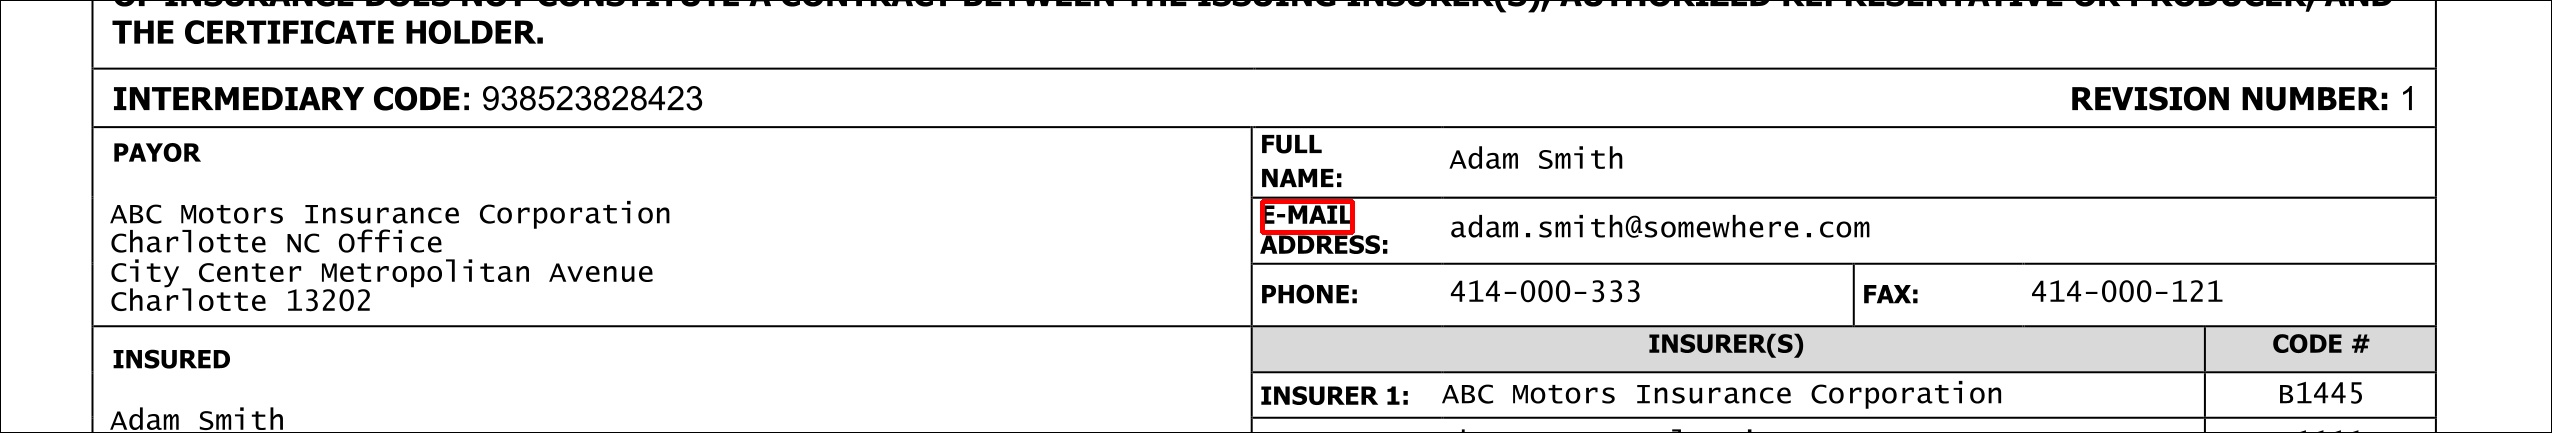

In [8]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

1. If no `anhorPoint1` and `anchorPoint2` given, it returns bbox of anchorText.
2. `similarityScore` given is `0.85`, above which if match found for `anchorText`, it returns the bbox of it.

### 3.6. Multiline anchor text match using 'normal' method

In [9]:
reg_def_dict_list = [
    {
        "anchorText": [
            "Comprehensive", "Coverage"
        ],
        "anchorTextMatch":{
            'method': 'normal',
            'similarityScore': 0.95
        },
        "anchorPoint1": {
            "left": 0, 
            "top": 0,
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None, 
            "top": None,
            "right": 0, 
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [10]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[166, 1258, 220, 49]]
region_bboxes = [[166, 1258, 220, 49]]


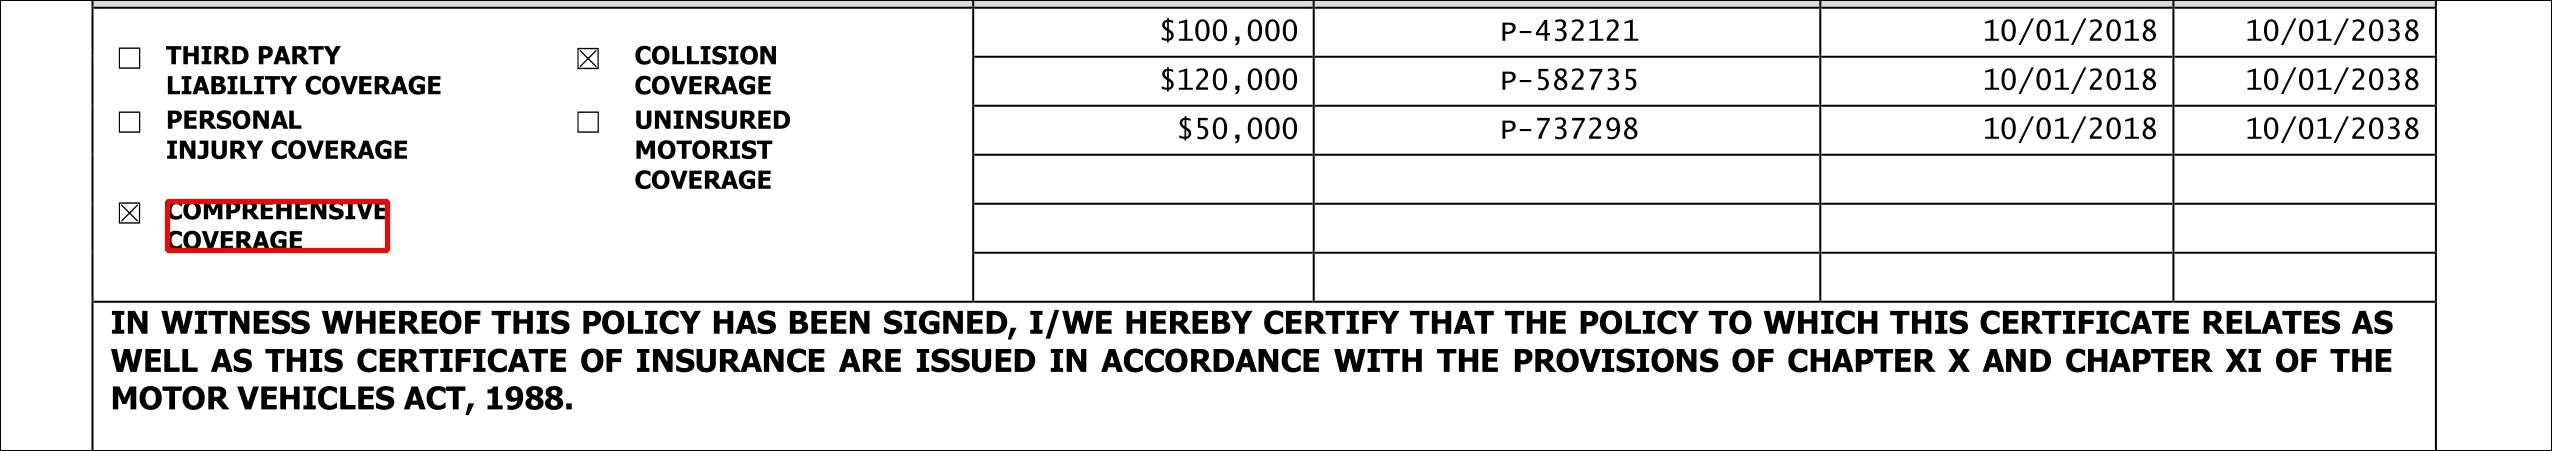

In [11]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

1. Using `anchorText` will get right side of value region by finding two rectangle points.
1. `similarityScore` given is `0.95`, above which if match found for `anchorText`, it returns the bbox of it.
1. Each word in a `anchorText` list is considered to be consecutive lines.

### 3.7. Synonyms - Single-line anchor text match using 'normal' method

In [12]:
reg_def_dict_list = [
    {
        "anchorText": [
            ["MAIL", "E-MAIL"]
        ],
        "anchorTextMatch":{
            'method': 'normal', 
            'similarityScore': 1
        },
        "anchorPoint1": {
            "left": 0,
            "top": 0, 
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None, 
            "top": None, 
            "right": 0, 
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [13]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[1261, 600, 90, 31]]
region_bboxes = [[1261, 600, 90, 31]]


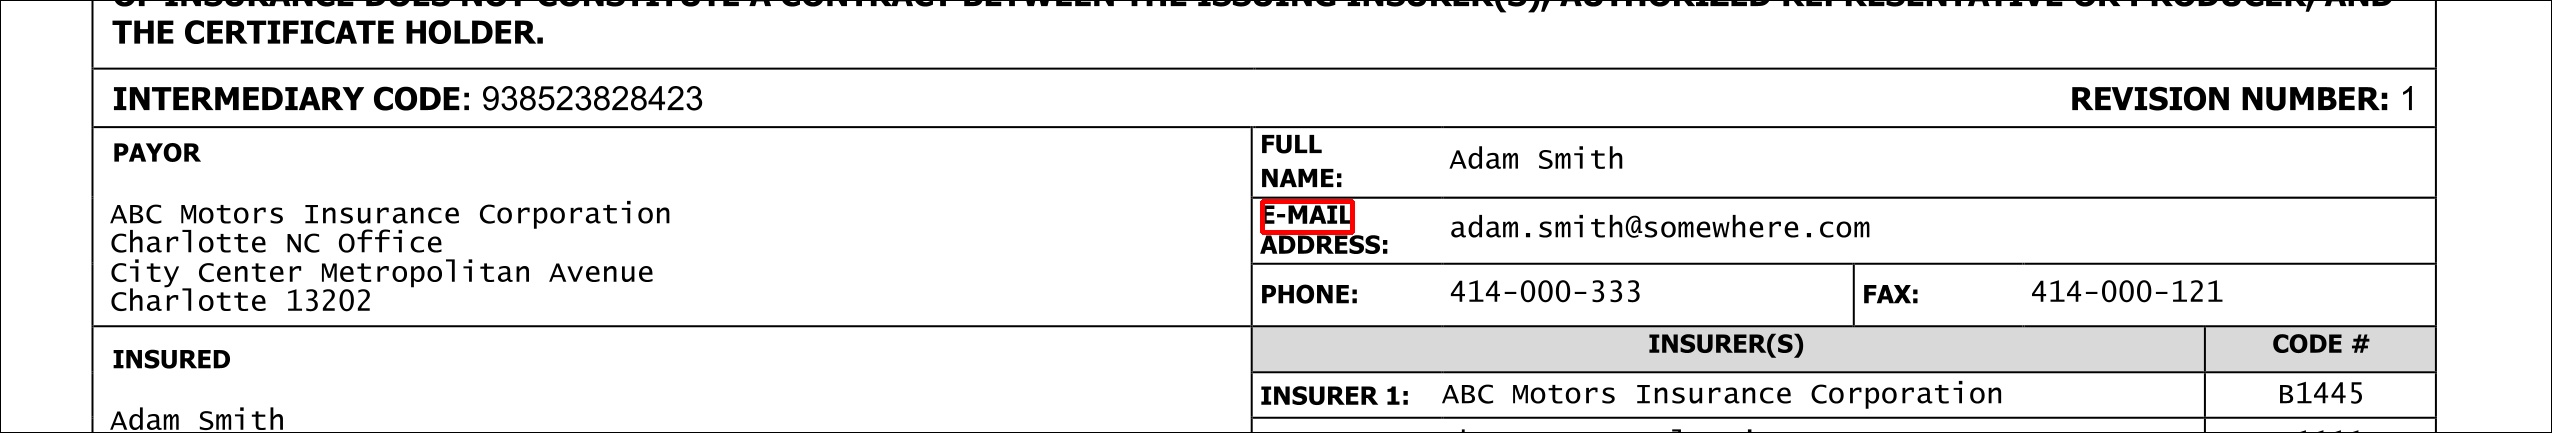

In [14]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

### 3.8. Synonyms - Multiline anchor text match using 'normal' method

In [15]:
reg_def_dict_list = [
    {
        "anchorText": [
            ["COMPREHENSIVE", "COLLISION"],
            ["COVERAGE"]
        ],
        "anchorTextMatch":{
            'method': 'normal', 
            'similarityScore': 0.93
        },
        "anchorPoint1": {
            "left": 0,
            "top": 0,
            "right": None, 
            "bottom": None
        },
        "anchorPoint2": {
            "left": None, 
            "top": None,
            "right": 0, 
            "bottom": 0
        }
    }
]
result = ocr_parse_obj.get_bbox_for(reg_def_dict_list)

#### Output

In [16]:
# print(json.dumps(result, indent=4))

#### Visualize

page = 1
anchor_text_bboxes = [[166, 1258, 220, 49]]
region_bboxes = [[166, 1258, 220, 49]]


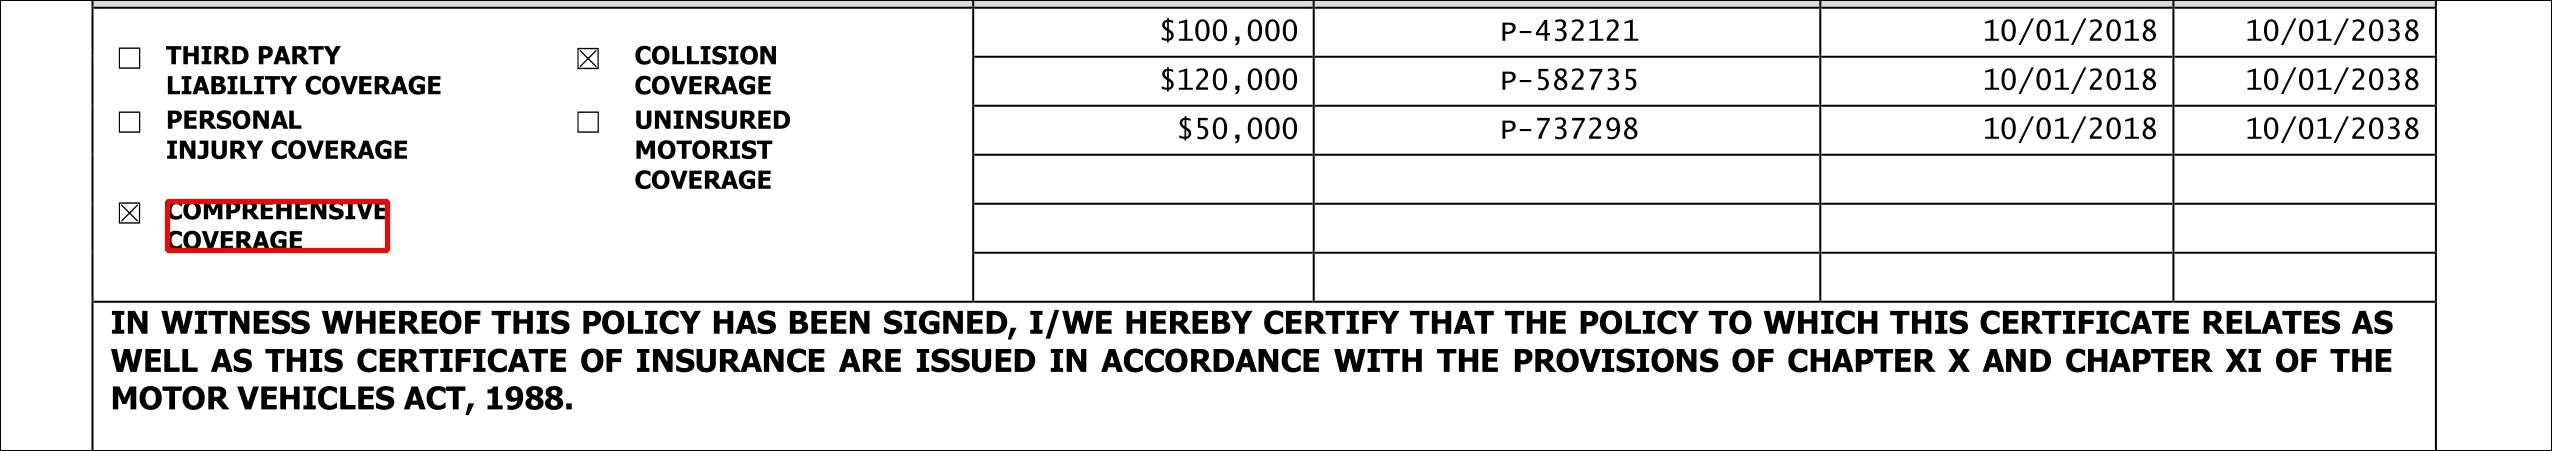

page = 1
anchor_text_bboxes = [[634, 1103, 141, 54]]
region_bboxes = [[634, 1103, 141, 54]]


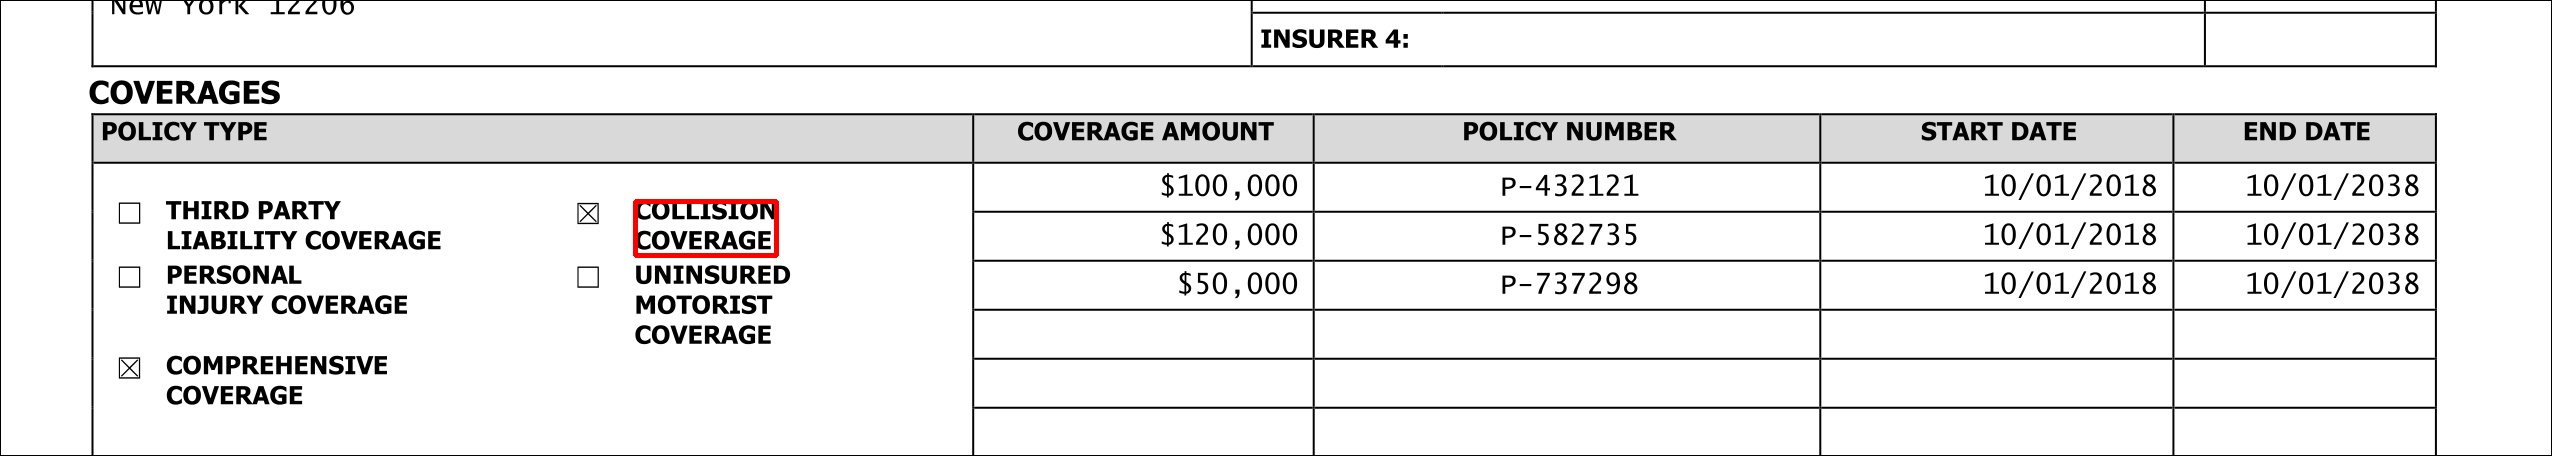

In [17]:
DemoHelper.visualize_get_bbox_for_result(result, IMAGE_PATHS)  

1. Using `anchorText` will get right side of value region by finding two rectangle points.
1. `similarityScore` given is `0.93`, above which if match found for `anchorText`, it returns the bbox of it.
1. Each element in the inner arrays, represents synonym words and each element in the outer list represents multiline match.